In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy
import os

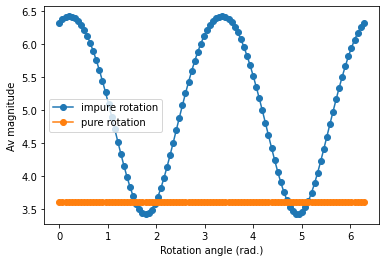

In [2]:
# matrice rotation challenge

# 2D input vector
v = np.array([3, -2]);

thetas = np.linspace(0, 2*math.pi, 100);
vecmags = np.zeros((len(thetas), 2))

for i in range(0, len(thetas)):
    theta = thetas[i];
    
    A_pure = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]]);
    A_impure = np.array([[2 * math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]]);

    vecmags[i, 0] = np.linalg.norm(A_impure@v.T);
    vecmags[i, 1] = np.linalg.norm(A_pure@v);

plt.plot(thetas, vecmags, 'o-')
plt.xlabel('Rotation angle (rad.)')
plt.ylabel('Av magnitude')
plt.legend(['impure rotation', 'pure rotation'])
plt.show()

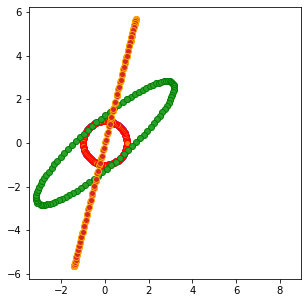

In [3]:
# generate XY coordinates for a circle
angles = np.linspace(0, 2 * np.pi, num=100)
radius = 1

plt.figure(1, figsize=(5, 5))

x = radius * np.cos(angles)
y = radius * np.sin(angles)

# plot the circle
plt.scatter(x, y, edgecolors='b')

# create a 2x2 matrix (starting with I)
I_m = np.identity(2)

# multiply matrix by coordinates
n_m = I_m@np.array([x, y])

# plot the new coords.
plt.scatter(n_m[0], n_m[1], edgecolors='r')

# try with various matrices...
n_m2 = np.array([[1, 3], [2, 2]])@np.array([x, y])
plt.scatter(n_m2[0], n_m2[1], edgecolors='g')

# try with a singular matrix (columns from a linearly_dependent set)
n_s = np.array([np.ones(2), np.ones(2) * 4])@np.array([x, y])
plt.scatter(n_s[0], n_s[1], edgecolors='orange')

plt.axis('square')
plt.show()

In [4]:
# challenge: symmetry of combined symmetric matrices

# create two symmetric matrices
n = 4
m = 4

N = np.random.randint(-10, 10, (m, n))
N2 = np.random.randint(-10, 10, (m, n))
S1 = np.round(N.T * N, m)
S2 = np.round(N2.T * N2, m)

# compute sum, multiplication and Hadamard multiplication of the two matrices
Sum = S1 + S2
Mult = S1@S2
HadMult = S1*S2

# determine whether the resulting matrix is still symmetric.
print(Sum - Sum.T)
print(Mult - Mult.T)
print(HadMult - HadMult.T)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[    0   816   402 -1494]
 [ -816     0  -936   112]
 [ -402   936     0  -474]
 [ 1494  -112   474     0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [5]:
# challenge: standard and Hadamard multiplication for diagonal matrix.
m = 4

# create two matrices (4x4): one is "full" - one with all of the elements have non-zero values and the other diagonal matrix.
A = np.random.randn(m, m)
B = np.diag(np.random.randn(m))

# multiply each matrix by itself (4 matrix multiplications): standard and Hadamard.
As = A@A
Ah = A*A
Bs = B@B
Bh = B*B

print(As)
print(' ')
print(Ah)
print(' ')
print(Bs)
print(' ')
print(Bh)

[[-0.56877768 -0.88612643 -1.14949437  1.98459962]
 [-0.10465224  0.23569915  0.14864701 -1.25939985]
 [ 1.16390747 -0.04034037 -1.05623893  3.09812912]
 [ 0.14391191  0.2121041   0.09527276  0.36017676]]
 
[[6.28494239e-01 1.57639428e-02 1.48548435e+00 3.41849975e+00]
 [1.25457746e-03 2.66813874e-01 8.25235748e-04 5.63261674e-01]
 [5.63460325e-01 3.50837509e-01 1.36275149e-01 4.06267765e+00]
 [2.40674995e-02 4.90778796e-03 2.13692446e-02 9.94235917e-01]]
 
[[1.66144654e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.14173630e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.16621236e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.87470790e-04]]
 
[[1.66144654e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.14173630e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.16621236e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.87470790e-04]]


X1 == X2: True


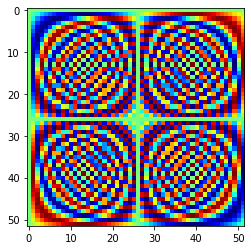

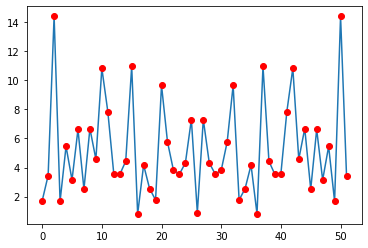

In [6]:
# fourier transform with matrix multiplication
n = 52
F = np.zeros((n, n), dtype=complex)
omega = np.e**(-2*np.pi*1j/n) 

for j in range(n):
    for k in range(n): 
        m = j * k
        F[j,k] = omega**m

x = np.random.randn(n)
X1 = F@x
X2 = np.fft.fft(x)

X1 = F@x
X2 = np.fft.fft(x)
print(f'X1 == X2: {np.allclose(X1, X2)}')

plt.imshow(F.imag, cmap='jet')
plt.show()

plt.figure()
plt.plot(abs(X1))
plt.plot(abs(X2), marker='o', color='r', linestyle='None')
plt.show()

In [7]:
# code challenge, rank of sum and product
m = 2
n = 5

A = np.random.randn(m, n)
B = np.random.randn(m, n)

AtA = A.T @ A
BtB = B.T @ B

print(f"Rank of AtA: {np.linalg.matrix_rank(AtA)}")
print(f"Rank of BtB: {np.linalg.matrix_rank(BtB)}")

prod = AtA @ BtB
sumOf = AtA + BtB

print(f"Rank of Prods: {np.linalg.matrix_rank(prod)}")
print(f"Rank of Sums: {np.linalg.matrix_rank(sumOf)}")

Rank of AtA: 2
Rank of BtB: 2
Rank of Prods: 2
Rank of Sums: 4


In [24]:
# Code challenge, reduced row echelon form of matrices with different sizes and ranks

# RREF of different matrices (random)
# - square
n = 4 # 4x4

squareMatrix = sympy.Matrix(np.random.randn(n, n))
# RREF
squareMatrixRref = squareMatrix.rref()
print(f'Square Matrix:\n{np.array(squareMatrix)}\n\nSquare Matrix RREF:\n{np.array(squareMatrixRref[0])}\n\n')

# - rectangular (tall, wide)
# + tall
m = 4
n = 3
tallMatrix = sympy.Matrix(np.random.randn(m, n))
tallMatrixRref = tallMatrix.rref()
print(f'Tall Matrix:\n{np.array(tallMatrix)}\n\nTall Matrix RREF:\n{np.array(tallMatrixRref[0])}\n\n')

# + wide
m = 3
n = 4
wideMatrix = sympy.Matrix(np.random.randn(m, n))
wideMatrixRref = wideMatrix.rref()
print(f'Wide Matrix:\n{np.array(wideMatrix)}\n\nWide Matrix RREF:\n{np.array(wideMatrixRref[0])}\n\n')

# - linear dependencies (columns, rows)
# + dependent columns
dependentColumnsMatrix = np.random.randn(n, n)
# make columns dependent
for i in range(1, dependentColumnsMatrix.shape[1]):
    dependentColumnsMatrix[:, i] = dependentColumnsMatrix[:, 0] * i * 2
dependentColumnsMatrixRref = sympy.Matrix(dependentColumnsMatrix).rref()
print(f'Dependent Columns Matrix:\n{dependentColumnsMatrix}\n\nDependent Columns Matrix RREF:\n{np.array(dependentColumnsMatrixRref[0])}')

# + dependent rows
dependentRowsMatrix = np.random.randn(n, n)
# make rows dependent
for i in range(1, dependentRowsMatrix.shape[0]):
    dependentRowsMatrix[i, :] = dependentRowsMatrix[0, :] * i * 2
dependentRowsMatrixRref = sympy.Matrix(dependentRowsMatrix).rref()
print(f'Dependent Rows Matrix:\n{dependentRowsMatrix}\n\nDependent Rows Matrix RREF:\n{np.array(dependentRowsMatrixRref[0])}')


Square Matrix:
[[-0.0659668345890754 -0.201425212512395 -0.724970513917683
  -0.0743524450950864]
 [0.793248098582808 -0.367029410088577 -0.0697681616562211
  1.03723614036423]
 [0.249305895237434 1.18525109053750 0.121218442675560 -0.959048214124335]
 [0.188018651630327 0.744893004905682 -0.902786585978521
  -0.261133979797633]]

Square Matrix RREF:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


Tall Matrix:
[[0.454451615925829 0.514222811073616 -0.00662326512617335]
 [-0.642493278022096 0.617967079644238 0.334600368477871]
 [0.228368821840870 0.333808514606397 0.414414946979260]
 [-0.341953138777305 0.180309612663606 -1.43708719555062]]

Tall Matrix RREF:
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]


Wide Matrix:
[[-1.77897195584757 -0.474056960161184 1.89876170469654
  -0.877509003930733]
 [-1.09844354270955 1.42078745962880 -0.326260086150343 0.232931806978836]
 [-0.0106987028654515 -0.255008396290052 -0.254525920565726
  -0.717151685572869]]

Wide Matrix RREF:
[[1 0 0 1.39803887334738]
 